__Date: 6 March 2019__

__Author: Christian Camilo Urcuqui López__

# Text Analytics

Most of the information on the Web is in textual format or in a semi-structured way. Analytics on this information plays an important role in order in gaining insights. Specifically, Text Analytics is the way to make a representation and modeling of the textual content in order to discover patterns. 

One of the main intentions of text analytics is to categorize documents into different classes. This helps in applications such as spam classification, news classification, and story classification.

## Steps to make text analytics

The process starts with a collection of text, removal of stopwords, generating bag of words, topic modeling, and finally fain insights around it.

+ __Text collection__
+ __Removal of stopwords__: the idea is to remove the words which do not convey significant information (for example, is, was, if, else, then, and others)
+ __Bag of words__: a word cloud model and bag of words are build. A vector of words representing their frequencies in the text is depicted through the bag of words and word cloud model. 
+ __Topic modeling__

## Names, Numbers, and stopwords Removal

The main module required for text anlytics and classification is _nltk_. In this module, we can find the '_stopwords_' module is used for removal process. The sentence is converted to lower case first using the _lower()_ function, and then punctuations are removed using _punctuation()_ method.

In [1]:
import string
from nltk.corpus import stopwords
import re

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Usuarios\rhaps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     D:\Usuarios\rhaps\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
sentence = "pretzelBros, airbnb for people who like pertzels, raises $2 million"
sentence = sentence.lower()
sentence

'pretzelbros, airbnb for people who like pertzels, raises $2 million'

In [33]:
# let's remove punctuations
symbols = string.punctuation
sentence = "".join([x for x in sentence if x not in symbols])
sentence

'pretzelbros airbnb for people who like pertzels raises 2 million'

In [34]:
# remove stopwords
sentence = " ".join([x for x in sentence.split() if x not in stopwords.words('english')])
sentence = re.sub('[0-9]',"", sentence )

In [35]:
sentence

'pretzelbros airbnb people like pertzels raises  million'

The next step is to calculate the number of ocurrences of the words is calculated based on the corpus. For this case the _CountVectorizer_ module is usted for counting.

{'computer': 1, 'device': 2, 'instructured': 5, 'perform': 8, 'specified': 9, 'instructions': 4, 'used': 11, 'automate': 0, 'manual': 7, 'labor': 6, 'unwatching': 10, 'execution': 3}


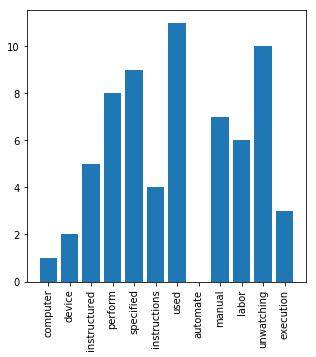

In [38]:
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# two phrases
Text = ["Computer is a device that can be instructured to perform specified instructions.", 
        "Computer is used to automate manual labor through unwatching instructions execution."]

def preprocess(sentence):
    sentence = sentence.lower()
    sentence = "".join([x for x in sentence if x not in string.punctuation])
    sentence = " ".join([x for x in sentence.split(" ") if x not in stopwords.words('english')])
    sentence = [x for x in sentence if x!=""]
    return "".join(sentence)
    
tf_vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocess)
model = tf_vectorizer.fit(Text)
print(model.vocabulary_)

x = [i for i in range(len(model.vocabulary_))]
y = []
x_t = []
for item in model.vocabulary_.keys():
    x_t.append(item)
    y.append(model.vocabulary_[item])

plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.xticks(x,x_t,rotation='vertical')
plt.show()

## Generating Bag of Words

Once the frequency of the words is calculated, a bag of words need to be generated for further analysis. The aim of it is to put the corpus of words into a common bad and then count the frequency of each word from the bag. While performing advanced tasks that involve the context of the words, the more powerful representations like word embegginds are used. 

Let's play with a file which has a part of the definition of artificial brain from Wikipedia, this examples allows us to demonstrate the use of bag of words.

In [55]:
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import TreebankWordTokenizer

def preprocess(sentence):
    sentence = sentence.lower()
    sentence = "".join([x for x in sentence if x not in string.punctuation])
    sentence = " ".join([x for x in sentence.split(" ") if x not in stopwords.words('english')])
    sentence = [x for x in sentence if x!=""]
    return "".join(sentence)


# let's open the text file
with open('matter.txt', 'r') as f:
    data = f.read()    
    Text = TreebankWordTokenizer().tokenize(data)
    print("number of sentences in the data %s"%len(Text))
    # total number of sentences in the data. 
    # Fit a bag of words estimator and transform the count matrix
    bow_vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocess)
    model = tf_vectorizer.fit(Text)
    bag_of_words = model.transform(Text)
    
    # Get the frequencies of the words
    bow  = bag_of_words.todense()
    # Get the words in the corpus
    words = model.get_feature_names()
    
    # See the details of the estimator values.
    print(bow.shape)
    print(len(words))
    

number of sentences in the data 58
(58, 26)
26


## Word Cloud Model

This commonly referred to as tag clouds represent graphically the word frequency appearing in a text file. Larger the font size in the word cloud, more frequently the word appears in the next. 

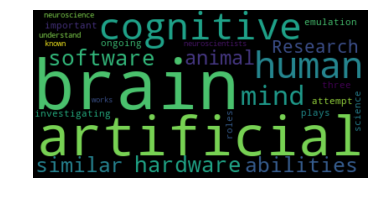

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import TreebankWordTokenizer
from nltk.probability import FreqDist

puncs = (list(punctuation))
puncs.extend(["s",""])

with open('matter.txt', 'r') as f:
    data = f.read()
wordcloud = WordCloud()
wordcloud.generate(data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this case 58 indicates the sentences in the corpus, whereas 26 indicates the total number of words in the corpus. 

## Examples

### Sentiment analysis of imdb reviews

We are going to use the last steps to predict the sentiment of the reviews on imdb website, the dataset was gotten from https://www.kaggle.com/utathya/imdb-review-dataset#imdb_master.csv

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [175]:
data = pd.read_csv('imdb_master.csv', encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
Unnamed: 0    100000 non-null int64
type          100000 non-null object
review        100000 non-null object
label         100000 non-null object
file          100000 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [71]:
data.dtypes

Unnamed: 0     int64
type          object
review        object
label         object
file          object
dtype: object

In [176]:
sentiment = []
for i in range(len(data)):
    if(data['label'][i] == "neg"):
        sentiment.append(0)
    else:
        sentiment.append(1)
serie = pd.Series(sentiment)
data = data.assign(sentiment=serie).copy()
data.head()

,Unnamed: 0,type,review,label,file,sentiment
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt,0
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt,0
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt,0
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt,0
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt,0


In [168]:
data.describe(include="all")

,Unnamed: 0,type,review,label,file,sentiment
count,100000.000000,100000,100000,100000,100000,100000.000000
unique,NaN,2,98469,3,92927,NaN
top,NaN,train,"Am not from America, I usually watch this show...",unsup,2019_10.txt,NaN
freq,NaN,75000,6,50000,2,NaN
mean,49999.500000,NaN,NaN,NaN,NaN,0.750000
std,28867.657797,NaN,NaN,NaN,NaN,0.433015
min,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,24999.750000,NaN,NaN,NaN,NaN,0.750000
50%,49999.500000,NaN,NaN,NaN,NaN,1.000000
75%,74999.250000,NaN,NaN,NaN,NaN,1.000000


In [171]:
print(data[data.sentiment == 1].shape)
print(data[data.sentiment == 0].shape)

(75000, 6)
(25000, 6)


In [177]:
data = data[data.sentiment == 0].append(data[data.sentiment == 1].sample(25000), ignore_index=True)

In [178]:
print(data[data.sentiment == 1].shape)
print(data[data.sentiment == 0].shape)

(25000, 6)
(25000, 6)


In [179]:
X = data.review
y = data.sentiment

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [112]:
#X_train = X_train[1:1000].copy()
#X_test = X_test[1:1000].copy()
#y_train = y_train[1:1000].copy()
#y_test = y_test[1:1000].copy()

In [181]:
def preprocess(sentence):
    sentence = sentence.lower()
    sentence = "".join([x for x in sentence if x not in string.punctuation])
    sentence = " ".join([x for x in sentence.split(" ") if x not in stopwords.words('english')])
    sentence = [x for x in sentence if x!=""]
    return "".join(sentence)

#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocess)
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [182]:
print(len(vectorizer.vocabulary_))
vectorizer.vocabulary_

90570


{'living': 47176,
 'zombie': 90418,
 'dream': 24203,
 'out': 57589,
 'of': 56638,
 '10': 47,
 'know': 44504,
 'this': 80415,
 'kind': 44134,
 'movie': 53441,
 'we': 87442,
 'all': 3232,
 'do': 23372,
 'that': 80135,
 'kid': 43989,
 'or': 57212,
 'two': 83078,
 'in': 39807,
 'high': 37292,
 'school': 70156,
 'who': 88127,
 'wanted': 87120,
 'to': 81082,
 'become': 7908,
 'famous': 28564,
 'director': 22543,
 'and': 3968,
 'got': 34028,
 'some': 74566,
 'friends': 31376,
 'together': 81149,
 'make': 48817,
 'film': 29548,
 'raised': 64537,
 'cash': 13335,
 'from': 31477,
 'local': 47296,
 'business': 12074,
 'parents': 58754,
 'showed': 72424,
 'their': 80196,
 'masterpiece': 49896,
 'the': 80156,
 'theater': 80169,
 'one': 56960,
 'saturday': 69637,
 'night': 55315,
 'best': 8631,
 'documentary': 23437,
 'films': 29596,
 'ever': 27423,
 'made': 48522,
 'american': 3688,
 'is': 41591,
 'about': 1611,
 'kids': 44021,
 'just': 43100,
 'like': 46785,
 'difference': 22259,
 'those': 80484,
 

We have in our bag of words 90570 words registered.

In [183]:
X_train_features = vectorizer.transform(X_train)
X_test_features = vectorizer.transform(X_test)
type(X_train_features)

scipy.sparse.csr.csr_matrix

In [186]:
primera_palabra = 15000
primera_reseña = 10
palabras = vectorizer.get_feature_names()[primera_palabra:primera_palabra+10]
pd.DataFrame(X_train_features[primera_reseña:primera_reseña+7, primera_palabra:primera_palabra+10].todense(), columns=palabras)

,chopra,chopras,chops,chopstick,chopsticks,chor,choral,chorale,chord,chords
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [187]:
modelo = MultinomialNB(alpha=0.01) #Alpha indica el coeficiente de Laplace smoothing de las probabilidades
modelo.fit(X_train_features, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [188]:
y_pred = modelo.predict(X_test_features)

In [189]:
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[5880, 1620],
       [2541, 4959]], dtype=int64)

In [190]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred))
print("Recall        : ", metrics.recall_score(y_test, y_pred))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred))
print("AUC           : ", metrics.roc_auc_score(y_test, y_pred))
print("-------------------------------------")

Exactitud:  0.7226
Kappa    :  0.44520000000000004
Precisión     :  0.7537619699042407
Recall        :  0.6612
Especificidad :  0.7537619699042407
F1-score      :  0.7044534412955464
AUC           :  0.7226
-------------------------------------


In [191]:
acc_test_vec=[]
alpha_vec= [100, 50, 10, 5, 1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.05, 0.01, 0.005, 0.001]
for alpha in alpha_vec:
    modelo = MultinomialNB(alpha=alpha)
    modelo.fit(X_train_features, y_train)
    y_pred = modelo.predict(X_test_features)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
alpha_optimo = alpha_vec[np.argmax(acc_test_vec)]
acc_optima= max(acc_test_vec)
print("El óptimo se obtiene con alpha=%f, que produce un %.3f%% de exactitud" %(alpha_optimo, 100*acc_optima))

El óptimo se obtiene con alpha=1.000000, que produce un 73.113% de exactitud


In [192]:
alphas = pd.DataFrame({"alpha": alpha_vec, "accuracy": acc_test_vec})
alphas

,alpha,accuracy
0,100.000,0.720267
1,50.000,0.723133
2,10.000,0.729600
3,5.000,0.730200
4,1.000,0.731133
5,0.500,0.731000
6,0.400,0.730600
7,0.300,0.730533
8,0.200,0.730133
9,0.100,0.728400


In [193]:
modelo = MultinomialNB(alpha=0.1)
modelo.fit(X_train_features, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [194]:
review = "I don't like this movie"
review_vec = vectorizer.transform([review])
print("{}: sentimiento={}".format(review, modelo.predict(review_vec)[0]))

review = "I really hated the film"
print("{}: sentimiento={}".format(review, modelo.predict(vectorizer.transform([review]))[0]))
review = "I love this movie"
print("{}: sentimiento={}".format(review, modelo.predict(vectorizer.transform([review]))[0]))
review = "I was going to say something awesome or great or good, but i simply can't because the movie is so bad"
print("{}: sentimiento={}".format(review, modelo.predict(vectorizer.transform([review]))[0]))

I don't like this movie: sentimiento=0
I really hated the film: sentimiento=0
I love this movie: sentimiento=1
I was going to say something awesome or great or good, but i simply can't because the movie is so bad: sentimiento=0


## References

+ Srinivasa, K.G., G M, Siddesh, H., Srinidhi (2018). Network Data Analytics A Hands-On Approach for Application Development